# Step-1
## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head(n=10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = df.values

In [5]:
data.shape

(42000, 785)

In [7]:
total_rows = data.shape[0]
test_rows = int(0.8*total_rows)

test_data = data[ : test_rows, : ]
train_data = data[test_rows : , : ]



In [9]:
test_data.shape

(33600, 785)

In [10]:
train_data.shape

(8400, 785)

In [16]:
test_data_X = test_data[ : , 1 : ]
test_data_Y = test_data[ : , 0]

In [18]:
train_data_X = train_data[ : , 1 : ]
train_data_Y = train_data[ : , 0]

# Step-2
## Applying KNN

In [23]:
def dist(X1, X2):
    return np.sqrt(sum((X1-X2)**2))

def knn(X, Y, query_point, k):
    dist_vals = []
    total_rows = X.shape[0]
    
    for i in range(total_rows):
        dist_from_ith_row = dist(X[i], query_point)
        dist_vals.append((dist_from_ith_row, Y[i]))
    
    dist_vals.sort()
    dist_vals = dist_vals[ : k]
    
    dist_vals = np.array(dist_vals)
    labels = np.unique(dist_vals, return_counts=True)
    max_freq_index = np.argmax(labels[1])
    return labels[0][max_freq_index]
    

In [28]:
knn(test_data_X, test_data_Y, train_data_X[10], k = 5)

3.0

In [29]:
train_data_Y[10]

3

# Image Visualization

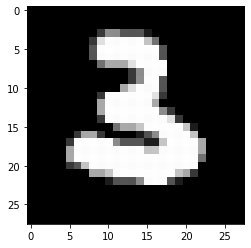

In [33]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
drawImg(train_data_X[10])

# Step-3
## Accuracy

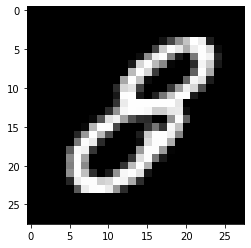

8
5.0
Accuracy:  0.9


In [40]:
total_train_rows = train_data_X.shape[0]

cv = 0

for i in range(10):
    predicted_val = knn(test_data_X, test_data_Y, train_data_X[i], k=5)
    actual_val = train_data_Y[i]
    
    if predicted_val == actual_val:
        cv = cv + 1
    else:
        drawImg(train_data_X[i])
        print(actual_val)
        print(predicted_val)
        

accuracy = cv/10
print("Accuracy: ",accuracy)